In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

A graph of 2 nodes:
0:[1]
1:[0]

Nodes: [0, 1]
Edges: [(0, 1)]


/Users/audreyrussell/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


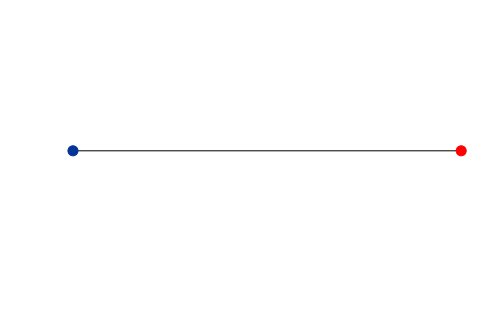

In [6]:
class Graph():
    def __init__(self):
        self.gdict = {}
        self.val = {}
        
    def add_node(self, node, val=0):
        '''add node if not in dict'''
        if node not in self.gdict:
            self.gdict[node] = []
        self.val[node] = val
    
    def add_edge(self, node1, node2):  
        '''add edge if not in dict'''
        self.add_node(node1)
        self.add_node(node2)

        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
    def get_nodes(self):
        """list of nodes"""
        return list(self.gdict.keys())
    
    def get_edges(self):
        """list of edges"""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        RED = (1,0,0)
        BLUE = (0,0.2,0.6)
        
        g_nx = nx.Graph()
        nodes = self.get_nodes()
        g_nx.add_nodes_from(nodes)
        g_nx.add_edges_from(self.get_edges())
        colors = []
        for i in range(len(nodes)):
            if self.val[nodes[i]]==0:
                colors.append(BLUE)
            else:
                colors.append(RED)
        nx.draw_kamada_kawai(g_nx, node_size=100, node_color=colors)
    
# Test
g = Graph()
g.add_edge(0,1)
print(g)
print('Nodes:',g.get_nodes())
print('Edges:',g.get_edges())
g.val[0] = 1
g.plot()

In [7]:
def degrees(g):
    """histogram!"""
    degrees = []
    for node,links in g.gdict.items():
        degrees.append(len(links))

    #print(degrees)
    hist = np.zeros(max(degrees)+1)
    for degree in degrees:
        hist[degree] += 1
    #print(hist)
    
    plt.figure()
    plt.plot(hist,'.-');
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    
    return hist


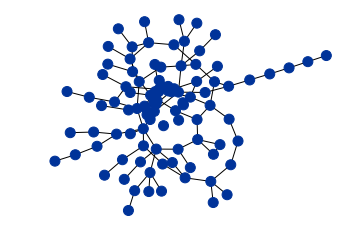

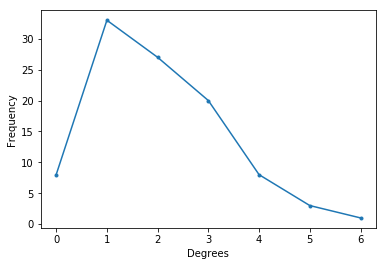

In [8]:
"""Let's screate a random network."""
def random_network(n_nodes=7):
    n_edges = n_nodes

    g = Graph()
    for i in range(n_nodes):
        g.add_node(i)
    edges = []
    while len(edges)<n_edges:
        n1 = np.random.randint(low=0, high=n_nodes)
        n2 = np.random.randint(low=0, high=n_nodes)
        if n2<n1:
            n1,n2 = n2,n1

        if (n1,n2) not in edges and n1!=n2:
            g.add_edge(n1,n2)
            edges.append((n1,n2))
    return g
    
#print(g)

g = random_network(100)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
degrees_random = degrees(g)


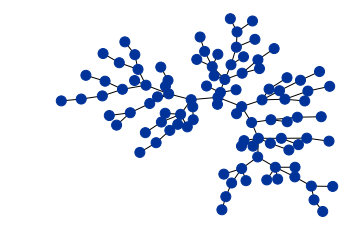

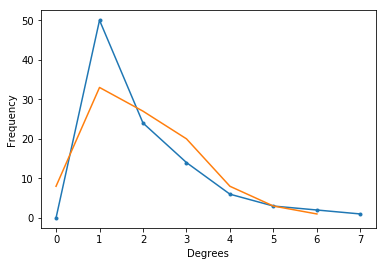

In [9]:
def rich_club_network(n_nodes = 9):
    g = Graph()
    for i in range(n_nodes):
        if i == 0:
            g.add_node(0)
        else:
            g.add_edge(i, np.random.randint(low = 0, high = i))
    return g

g = rich_club_network(100)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
degrees(g)
plt.plot(degrees_random)

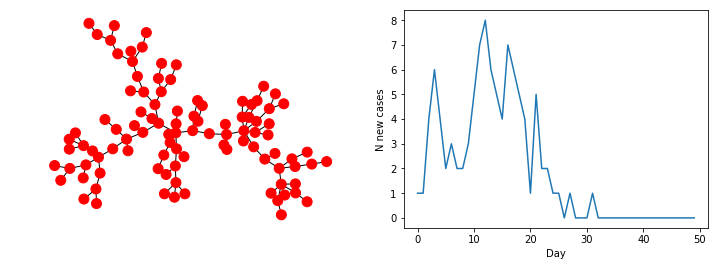

In [20]:
def pandemic(g, prob = 0.5, nsteps = 30, n_nodes = 30):
    for node in g.get_nodes():
        g.val[node] = 0  
        patient_zero = np.random.randint(low = 0, high = n_nodes)
    g.val[patient_zero] = 1             

    history = np.zeros(nsteps)
    for t in range(nsteps):
        newly_infected = []
        for node in g.get_nodes():
            if g.val[node]==1:
                neighbors = g.gdict[node]
                for neighbor in neighbors:
                    if g.val[neighbor]==0 and np.random.uniform()<prob:
                        newly_infected.append(neighbor)
        for node in newly_infected:
            g.val[node] = 1
        history[t] = len(newly_infected)
    return history

history = pandemic(g, prob=0.5, nsteps=50)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(history);
plt.xlabel('Day');
plt.ylabel('N new cases');

hw: compare the two network configurations, run pandemic on both to compare the plots of the two cases. keep everything else the same (the number of nodes, edges, probability of spread, etc.)

add a loop averaging to run several experiments for both network types–this means generate n different networks and run pandemics on each of them. remember the curves, average the curves, and plot these smoothed averages

when running pandemic, don't always infect the 0th node

make a guess as to which type of network will be more prone to a pandemic

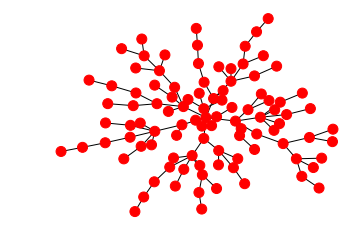

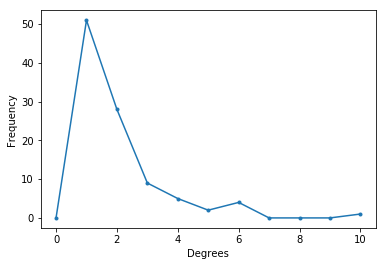

In [22]:
def richclub_pandemic(g, prob = 0.5, nsteps = 30):
    g = Graph()
    for i in range(n_nodes):
        if i == 0:
            g.add_node(0)
        else:
            g.add_edge(i, np.random.randint(low = 0, high = i))
    return g


g = rich_club_network(100)
p = pandemic(g)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
degrees_random = degrees(g)

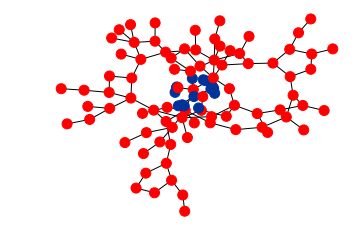

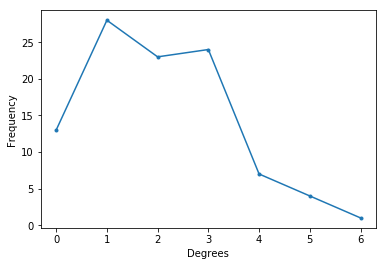

In [41]:
def random_pandemic(g, prob = 0.5, nsteps = 30):
    n_edges = n_nodes

    g = Graph()
    for i in range(n_nodes):
        g.add_node(i)
    edges = []
    while len(edges)<n_edges:
        n1 = np.random.randint(low=0, high=n_nodes)
        n2 = np.random.randint(low=0, high=n_nodes)
        if n2<n1:
            n1,n2 = n2,n1

        if (n1,n2) not in edges and n1!=n2:
            g.add_edge(n1,n2)
            edges.append((n1,n2))
    return g
    
#print(g)

g = random_network(100)
p = pandemic(g)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
degrees_random = degrees(g)


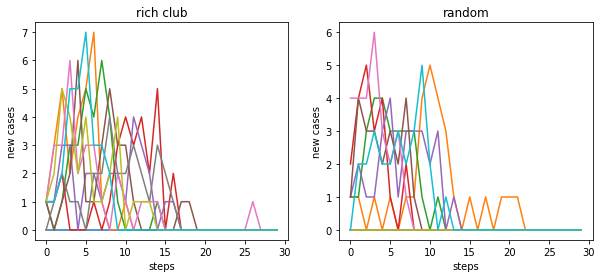

In [57]:
plt.figure(figsize = (10,4))
ntrials = 10
nsteps = 30
n_nodes = 50
richclub_history = np.zeros(shape = (nsteps, ntrials))
random_history = np.zeros(shape = (nsteps, ntrials))

for i in range(1, ntrials):
    richclub_add = pandemic(rich_club_network(30), prob=0.5, nsteps=30)
    richclub_history[:,i] = (richclub_add)
    random_add = pandemic(random_network(30), prob=0.5, nsteps=30)
    random_history[:,i] = (random_add)

        
plt.subplot(121)
plt.plot(richclub_history)
plt.title('rich club')
plt.xlabel('steps');
plt.ylabel('new cases');
    
plt.subplot(122)
plt.plot(random_history);
plt.title("random")
plt.xlabel('steps');
plt.ylabel('new cases');

Just from looking at the above figures, I can see that the random network "flattens the curve" affter 15-20 trials, whereas the branched network takes 20-25 trials to do the same thing. This makes sense since there are more "hubs" (nodes with several edges) in the branched network than in the random one–this is indicated by the peakes–and more entirely unattached nodes in the random network than in the branched one. 